In [1]:
from io import StringIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import datetime
import time
import feature_handler as handler

In [2]:
Stock_list = pd.read_csv('name.csv')['name']
date = pd.read_csv('date.csv')['date']
Stock = pd.read_csv('model.csv')
Stock = Stock.drop_duplicates()

In [3]:
day = 3
upper = 0.05
lower = -0.02
labelp = "p" + str(day) + "_" + str(upper)
labeld = "d" + str(day) + "_" + str(upper)
handler.rise_estimate(Stock, day , upper , lower ,labelp)
handler.drop_estimate(Stock, day , upper , lower,labeld)

max() arg is an empty sequence 458791
min() arg is an empty sequence 458791


In [4]:
day = 5
upper = 0.1
lower = -0.05
true = "true_label"
handler.rise_estimate(Stock, day , upper , lower , true)

max() arg is an empty sequence 458791


In [5]:
Klist = ['最高價','收盤價','成交金額']
i=0
while i<len(Klist):
    name=str(Klist[i])
    Stock[(name+"比率")]=""
    temp=Stock[name].shift(+1)
    Stock[(name+"比率")]=Stock[name]/(temp+0.000001)
    i+=1
Stock

,證券代號,成交股數,成交筆數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,本益比,...,pre3p0.05,pre3d0.05,pre1p0.03,pre1d0.03,p3_0.05,d3_0.05,true_label,最高價比率,收盤價比率,成交金額比率
0,1102.0,7513759.0,4346.0,2.851104e+08,37.65,38.05,37.65,37.90,0.10,11.59,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1102.0,7025972.0,3222.0,2.659728e+08,38.00,38.10,37.10,37.40,0.50,11.44,...,0,0,0,0,0,0,0,1.001314,0.986807,0.932877
2,1102.0,6763011.0,4012.0,2.557391e+08,37.40,38.00,37.40,37.95,0.55,11.61,...,0,0,0,0,0,0,0,0.997375,1.014706,0.961523
3,1102.0,12381905.0,4961.0,4.721153e+08,38.00,38.35,37.60,38.35,0.40,11.73,...,0,0,0,0,0,0,0,1.009210,1.010540,1.846082
4,1102.0,12821758.0,6876.0,4.964785e+08,38.05,39.20,38.05,38.85,0.50,11.88,...,0,0,1,0,0,0,0,1.022164,1.013038,1.051604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458787,9958.0,3243730.0,2362.0,3.738433e+08,115.00,117.50,113.50,114.00,1.00,26.57,...,0,0,0,0,0,0,0,1.012931,0.991304,1.014121
458788,9958.0,1802311.0,1344.0,2.043568e+08,115.00,115.00,112.50,113.50,0.50,26.46,...,0,0,0,1,0,0,0,0.978723,0.995614,0.546638
458789,9958.0,4507193.0,2812.0,5.211094e+08,115.00,117.00,113.50,116.00,2.50,27.04,...,0,0,1,0,0,0,0,1.017391,1.022026,2.549998
458790,9958.0,11556804.0,7457.0,1.349493e+09,117.00,121.50,112.00,112.00,4.00,26.11,...,0,0,0,1,0,1,0,1.038462,0.965517,2.589653


In [6]:
Stock.columns.values

array(['證券代號', '成交股數', '成交筆數', '成交金額', '開盤價', '最高價', '最低價', '收盤價', '漲跌價差',
       '本益比', '融資買', '融資賣', '融資餘', '融卷買', '融卷賣', '融卷餘', 'ratio', '外資進出',
       '外資進', '外資出', '投信進出', '投信進', '投信出', '自營進出', '自營進', '自營出', '避險進出',
       '避險進', '避險出', '三大', 'date', '年前高', '季前高', '漲跌', '實紅棒', '紅棒天線',
       '實黑棒', '黑棒天線', '上避雷針', '下避雷針', '連漲跌', '均漲天數', '均跌天數', 'MA60',
       'MA5', 'MA10', 'MA20', 'buy5', 'buy10', '外5', '外10', '投5', '投10',
       '自5', '三大5', '三大10', '日振幅', '波動率', 'MA交叉型態', 'K', 'D', 'KD交叉型態',
       'KD交叉型態2', 'RSI5', 'MA5 slope', 'MA10 slope', 'MA60 slope',
       'ratio slope', 'margin slope', 'short slope', '三大 slope',
       '外資5 slope', '投信5 slope', '自營 slope', 'buy5 slope', 'buy10 slope',
       'MA5 acc', 'RSI5鈍化', '外5金', '投5金', '自5金', '融資金', '融卷金', 'D5',
       'D60', 'D三大', 'D_upper_day', 'UD5', 'UD60', 'UD前高壓力', 'UD波段壓立',
       '均線糾結1', '均線糾結2', '三陽開泰', '突破前高', '均買量', 'R_散戶', '超漲跌', 'pre5p0.1',
       'pre5d0.1', 'pre3p0.05', 'pre3d0.05', 'pre1p0.03', 'pre1d0.03',
   

In [7]:
Stock[labeld].value_counts()

0    429902
1     28890
Name: d3_0.05, dtype: int64

In [8]:
Stock[labelp].value_counts()

0    425610
1     33182
Name: p3_0.05, dtype: int64

## 只選top50
list_s = pd.read_csv('150股票代號.csv').代號

test = Stock [Stock.證券代號.isin(list_s[0:49])]
test[labelp].value_counts()

In [9]:
Stock

,證券代號,成交股數,成交筆數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,本益比,...,pre3p0.05,pre3d0.05,pre1p0.03,pre1d0.03,p3_0.05,d3_0.05,true_label,最高價比率,收盤價比率,成交金額比率
0,1102.0,7513759.0,4346.0,2.851104e+08,37.65,38.05,37.65,37.90,0.10,11.59,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1102.0,7025972.0,3222.0,2.659728e+08,38.00,38.10,37.10,37.40,0.50,11.44,...,0,0,0,0,0,0,0,1.001314,0.986807,0.932877
2,1102.0,6763011.0,4012.0,2.557391e+08,37.40,38.00,37.40,37.95,0.55,11.61,...,0,0,0,0,0,0,0,0.997375,1.014706,0.961523
3,1102.0,12381905.0,4961.0,4.721153e+08,38.00,38.35,37.60,38.35,0.40,11.73,...,0,0,0,0,0,0,0,1.009210,1.010540,1.846082
4,1102.0,12821758.0,6876.0,4.964785e+08,38.05,39.20,38.05,38.85,0.50,11.88,...,0,0,1,0,0,0,0,1.022164,1.013038,1.051604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458787,9958.0,3243730.0,2362.0,3.738433e+08,115.00,117.50,113.50,114.00,1.00,26.57,...,0,0,0,0,0,0,0,1.012931,0.991304,1.014121
458788,9958.0,1802311.0,1344.0,2.043568e+08,115.00,115.00,112.50,113.50,0.50,26.46,...,0,0,0,1,0,0,0,0.978723,0.995614,0.546638
458789,9958.0,4507193.0,2812.0,5.211094e+08,115.00,117.00,113.50,116.00,2.50,27.04,...,0,0,1,0,0,0,0,1.017391,1.022026,2.549998
458790,9958.0,11556804.0,7457.0,1.349493e+09,117.00,121.50,112.00,112.00,4.00,26.11,...,0,0,0,1,0,1,0,1.038462,0.965517,2.589653


In [10]:
test = Stock[Stock['成交金額'] > 200000000]
test = test[test['連漲跌'] > 0]
test = test[test['融資餘'] > 1000]

test[labelp].value_counts()


0    29457
1     3583
Name: p3_0.05, dtype: int64

day = [5]
upper = 0.1
lower = -0.05
for i in day:
    drop_estimate(Stock, i , upper , lower)

In [11]:
test.columns

Index(['證券代號', '成交股數', '成交筆數', '成交金額', '開盤價', '最高價', '最低價', '收盤價', '漲跌價差',
       '本益比',
       ...
       'pre3p0.05', 'pre3d0.05', 'pre1p0.03', 'pre1d0.03', 'p3_0.05',
       'd3_0.05', 'true_label', '最高價比率', '收盤價比率', '成交金額比率'],
      dtype='object', length=110)

In [12]:
for_model = test.drop([ '成交股數', '成交筆數', '成交金額', '開盤價', '最高價', '最低價', '收盤價',
        '漲跌價差', '融資買', '融資賣', '融資餘', '融卷買', '融卷賣', '融卷餘', '外資進出', '外資進', '外資出',  
        '三大', '外5', '投5', 'MA5', 'MA10', 'MA20', 'MA60', 'buy5', 'buy10','外10' , '投10', '自5', '三大5', '三大10',
       '投信進出', '投信進', '投信出', '自營進出', '自營進', '自營出', '避險進出', '避險進', '避險出'
        ,'R_散戶','年前高', '季前高'],axis = 1)

In [13]:
for_model.columns

Index(['證券代號', '本益比', 'ratio', 'date', '漲跌', '實紅棒', '紅棒天線', '實黑棒', '黑棒天線',
       '上避雷針', '下避雷針', '連漲跌', '均漲天數', '均跌天數', '日振幅', '波動率', 'MA交叉型態', 'K', 'D',
       'KD交叉型態', 'KD交叉型態2', 'RSI5', 'MA5 slope', 'MA10 slope', 'MA60 slope',
       'ratio slope', 'margin slope', 'short slope', '三大 slope', '外資5 slope',
       '投信5 slope', '自營 slope', 'buy5 slope', 'buy10 slope', 'MA5 acc',
       'RSI5鈍化', '外5金', '投5金', '自5金', '融資金', '融卷金', 'D5', 'D60', 'D三大',
       'D_upper_day', 'UD5', 'UD60', 'UD前高壓力', 'UD波段壓立', '均線糾結1', '均線糾結2',
       '三陽開泰', '突破前高', '均買量', '超漲跌', 'pre5p0.1', 'pre5d0.1', 'pre3p0.05',
       'pre3d0.05', 'pre1p0.03', 'pre1d0.03', 'p3_0.05', 'd3_0.05',
       'true_label', '最高價比率', '收盤價比率', '成交金額比率'],
      dtype='object')

In [14]:
model = for_model[for_model['date'] >  date [len(date)-(80)]]
model = handler.加入產概(model,pd.read_csv("合併.csv"))
#normal = normal[normal[labelp] == 0]

#detect = for_model[for_model[labelp] == 1]
#detect = detect[for_model['date'] >  date [len(date)-(70)]]
#model = detect.append(normal)

In [15]:
model[labeld].value_counts()

0    26533
1     3281
Name: d3_0.05, dtype: int64

In [16]:
model[labelp].value_counts()

0    26502
1     3312
Name: p3_0.05, dtype: int64

In [17]:
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import precision_score
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
flag = True
cost =  model[labelp].value_counts()[0] /  model[labelp].value_counts()[1]

In [18]:
index = pd.read_csv('Market_index.csv')
index = index[index['Index']=='發行量加權股價指數']
index.sort_values(by=['date'] , ascending=True, axis =0 , inplace=True)
index = index.reset_index(drop=True)

ma5 = []
handler.增加技術指標MA(index,5,'收盤',ma5)
index['ma5'] = ma5
handler.Slope(index , '斜率' , 'ma5')
handler.Slope(index , '加速度' , '斜率')


import math
for i in range(len(index)):
    k = index.加速度[i]
    if k !=0:
        if k >0 : 
            index.加速度[i] = math.pow(k , 1/3)
        else :
            index.加速度[i] = -math.pow(abs(k) , 1/3)



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [19]:
drop_precision_test = pd.DataFrame()
precision_test = pd.DataFrame()

In [20]:
def 合併預測資料(xt,yt,xte,yte,ytp,ytep,t):
   
    xt["label"]=yt
    xt["預測結果"]=ytp
    
    
    xte["label"]=yte
    xte["預測結果"]=ytep
    
    ALL=xt.append(xte)

    ALL["昨天預測結果"]=ALL["預測結果"].shift(1)
    ALL["前天預測結果"]=ALL["預測結果"].shift(2)
    ALL["大前天預測結果"]=ALL["預測結果"].shift(3)
    ALL["昨天是否預測正確"]=(ALL["label"].shift(1)==ALL["昨天預測結果"]).astype(int)
    ALL["前天是否預測正確"]=ALL["昨天是否預測正確"].shift(1)
    ALL["大前天是否預測正確"]=ALL["昨天是否預測正確"].shift(2)
    ALL=ALL.dropna(subset=["昨天預測結果", "前天預測結果","大前天預測結果"])
    ALL["date"]=t["date"]
    ALL["證券代號"]=t["證券代號"]
    return ALL

In [21]:
K = 5
interval = 140
t = model[model['date'] <= date [K]]

trainp = t [t['date'] < date [K+interval] ]
testp = t [t['date'] >= date [K+interval] ]
#ros = RandomOverSampler(random_state42)

X_train = trainp.drop(['date','證券代號', labelp,labeld ],axis = 1)
y_train = trainp[labelp]

X_test = testp.drop(['date', '證券代號',labelp,labeld],axis = 1)
y_test = testp[labelp]

#X_train, y_train = SMOTE(random_state=42).fit_resample(X_train, y_train)
#ros = RandomOverSampler(random_state = 40)

#X_train, y_train = ros.fit_resample(X_train, y_train)


xgbc = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.01, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=400, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=cost,
              seed=27, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)
xgbc.fit(X_train,y_train)
y_test_predp = xgbc.predict(X_test)
y_train_predp = xgbc.predict(X_train)
model=合併預測資料(X_train,y_train,X_test,y_test,y_train_predp,y_test_predp,t).drop(columns=["預測結果","前天預測結果","大前天預測結果",'昨天是否預測正確','前天是否預測正確','大前天是否預測正確',])

In [22]:
model.columns

Index(['本益比', 'ratio', '漲跌', '實紅棒', '紅棒天線', '實黑棒', '黑棒天線', '上避雷針', '下避雷針',
       '連漲跌',
       ...
       '產業別_電機機械', '產業別_電腦及週邊設備業', '產業別_食品工業', '上月比較增減(%)', '去年同月增減(%)',
       '前期比較增減(%)', 'label', '昨天預測結果', 'date', '證券代號'],
      dtype='object', length=294)

t = model[model['date'] <= date [55]]
trainp = t [t['date'] < date [55] ]
trainp = trainp[trainp['date'] >= date [70]]
#ros = RandomOverSampler(random_state42)

X_train = trainp.drop(['date','證券代號','label',true],axis = 1)
y_train = trainp['label']


#X_train, y_train = SMOTE(random_state=42).fit_resample(X_train, y_train)
#ros = RandomOverSampler(random_state = 40)

#X_train, y_train = ros.fit_resample(X_train, y_train)


xgbc = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.01, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=200, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=cost,
              seed=27, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)
xgbc.fit(X_train,y_train)


pre_date = []
pre = [] 
for i in range(50):
    K = i + 5 
    interval = 0
    t = model[model['date'] <= date [K]]
    testp = t [t['date'] >= date [K+interval] ]
    
    X_test = testp.drop(['date', '證券代號','label',true],axis = 1)
    y_test = testp[true]

    y_test_predp = xgbc.predict(X_test)
    threshold = 0.93
    predicted_proba = xgbc.predict_proba(X_test)
    predicted = (predicted_proba [:,1] >= threshold).astype('int')
    
    if (len (predicted[predicted == 1]) == 0) :
        pre.append(-0.1)
    else :
        pre.append(precision_score(y_test ,predicted))
    pre_date.append(date[K])
    

i = 60
K = i + 5
interval = 4
t = model[model['date'] <= date [K]]
testp = t [t['date'] >= date [K+interval-3] ]
trainp = t [t['date'] < date [K+interval] ]
trainp = trainp[trainp['date'] >= date [K+interval+15]]

In [47]:
pre_date = []
pre = [] 
for i in range(80):
    K = i + day
    interval = day-1
    t = model[model['date'] <= date [K]]
    testp = t [t['date'] >= date [K+1] ]
    trainp = t [t['date'] < date [K+interval] ]
    trainp = trainp[trainp['date'] >= date [K+interval+15]]
    #ros = RandomOverSampler(random_state42)
    
    X_train = trainp.drop(['date','證券代號','label',true],axis = 1)
    y_train = trainp['label']
    
    X_test = testp.drop(['date', '證券代號','label',true],axis = 1)
    y_test = testp[true]

    #X_train, y_train = SMOTE(random_state=42).fit_resample(X_train, y_train)
    #ros = RandomOverSampler(random_state = 40)

    #X_train, y_train = ros.fit_resample(X_train, y_train)


    xgbc = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
                  colsample_bynode=1, colsample_bytree=0.8, gamma=0.01, gpu_id=-1,
                  importance_type='gain', interaction_constraints='',
                  learning_rate=0.1, max_delta_step=0, max_depth=6,
                  min_child_weight=1, monotone_constraints='()',
                  n_estimators=200, n_jobs=4, nthread=4, num_parallel_tree=1,
                  random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=cost,
                  seed=27, subsample=0.8, tree_method='exact',
                  validate_parameters=1, verbosity=None)
    xgbc.fit(X_train,y_train)
    y_test_predp = xgbc.predict(X_test)
    y_train_predp = xgbc.predict(X_train)

    threshold = 0.93
    predicted_proba = xgbc.predict_proba(X_test)
    predicted = (predicted_proba [:,1] >= threshold).astype('int')
    
    if (len (predicted[predicted == 1]) == 0) :
        pre.append(-0.1)
    else :
        pre.append(precision_score(y_test ,predicted))
    pre_date.append(date[K])
    

In [48]:
threshold = 0.9
predicted_proba = xgbc.predict_proba(X_test)
predicted = (predicted_proba [:,1] >= threshold).astype('int')
confusion_matrix(y_test, predicted)

array([[155,   0],
       [ 12,   0]], dtype=int64)

In [49]:
precision_score(y_test ,predicted)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [50]:
len(pre)

80

In [51]:
precision_test = pd.DataFrame()
precision_test['date'] = pre_date
precision_test['precision'] = pre
precision_test.sort_values(by=['date'] , ascending=True, axis =0 , inplace=True)
precision_test = precision_test.reset_index(drop=True)


In [52]:
index_ = index[index.date >= pre_date[-1]]
index_ = index_.reset_index(drop=True)
index_

,Index,收盤,漲跌,漲跌%,date,ma5,斜率,加速度
0,發行量加權股價指數,14384.96,135.00,0.95,20201221,14218.584,-0.0165,-5.928708
1,發行量加權股價指數,14177.46,207.50,-1.44,20201222,14253.366,0.2446,-11.898486
2,發行量加權股價指數,14223.09,45.63,0.32,20201223,14275.154,0.1529,-3.342311
3,發行量加權股價指數,14280.28,57.19,0.40,20201224,14258.880,-0.1140,-5.576606
4,發行量加權股價指數,14331.42,51.14,0.36,20201225,14263.150,0.0299,-5.031074
...,...,...,...,...,...,...,...,...
80,發行量加權股價指數,17595.90,23.61,0.13,20210427,17299.102,0.3585,4.895872
81,發行量加權股價指數,17567.53,28.37,-0.16,20210428,17353.508,0.3145,-2.304540
82,發行量加權股價指數,17566.66,0.87,0.00,20210429,17426.592,0.4211,3.232852
83,發行量加權股價指數,17222.35,344.31,-1.96,20210503,17520.530,0.5390,3.034122


In [53]:
precision_test

,date,precision
0,20201221,0.000000
1,20201222,1.000000
2,20201223,1.000000
3,20201224,1.000000
4,20201225,0.538462
...,...,...
75,20210420,0.562500
76,20210421,0.347826
77,20210422,0.107143
78,20210423,0.250000


In [54]:
sum(precision_test[precision_test['precision']>=0].precision)/len(precision_test[precision_test['precision']>=0].precision)

0.3681294211014675

Text(0.5, 1.0, 'precision v.s. Market ')

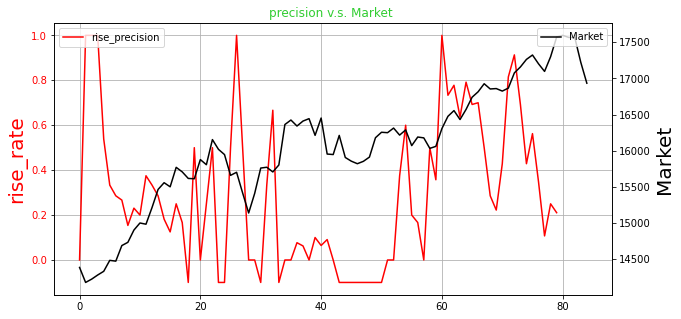

In [55]:

fig,ax=plt.subplots(figsize=(10,5))
ax.plot(precision_test.precision,color='red',label='rise_precision')
ax.set_ylabel('rise_rate',color='red',fontsize=20)
ax.tick_params(axis='y',labelcolor='red')
plt.grid()
ax.legend(loc='upper left')


ax2=ax.twinx()
ax2.plot(index_.收盤,color='black',label='Market')
ax2.set_ylabel('Market',color='black',fontsize=20)
ax2.tick_params(axis='y',labelcolor='black')
ax2.legend(loc='upper right')

plt.title('precision v.s. Market ', color='limegreen')


In [155]:
pre_date = []
pre = [] 


for i in range(120):
    K = i+5
    interval = 30
    t = model[model['date'] <= date [K]]

    trainp = t [t['date'] < date [K+interval] ]
    testp = t [t['date'] >= date [K+interval] ]
    #ros = RandomOverSampler(random_state42)

    X_train = trainp.drop(['date','證券代號', labelp,labeld ],axis = 1)
    y_train = trainp[labeld]

    X_test = testp.drop(['date', '證券代號',labelp,labeld],axis = 1)
    y_test = testp[labeld]

    #X_train, y_train = SMOTE(random_state=42).fit_resample(X_train, y_train)
    #ros = RandomOverSampler(random_state = 40)

    #X_train, y_train = ros.fit_resample(X_train, y_train)


    xgbc = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
                  colsample_bynode=1, colsample_bytree=0.8, gamma=0.01, gpu_id=-1,
                  importance_type='gain', interaction_constraints='',
                  learning_rate=0.1, max_delta_step=0, max_depth=6,
                  min_child_weight=1, monotone_constraints='()',
                  n_estimators=400, n_jobs=4, nthread=4, num_parallel_tree=1,
                  random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=cost,
                  seed=27, subsample=0.8, tree_method='exact',
                  validate_parameters=1, verbosity=None)
    xgbc.fit(X_train,y_train)
    y_test_predp = xgbc.predict(X_test)
    y_train_predp = xgbc.predict(X_train)

    threshold = 0.55
    predicted_proba = xgbc.predict_proba(X_test)
    predicted = (predicted_proba [:,1] >= threshold).astype('int')
    
    if (len ( y_test[y_test == 1]) == 0) :
        pre.append(-0.1)
    else :
        pre.append(precision_score(y_test ,predicted))
    pre_date.append(date[i])

KeyboardInterrupt: 

In [ ]:
confusion_matrix( y_train ,y_train_predp)

In [ ]:
threshold = 0.7
predicted_proba = xgbc.predict_proba(X_test)
predicted = (predicted_proba [:,1] >= threshold).astype('int')
confusion_matrix(y_test, predicted)

In [ ]:
precision_score(y_test ,predicted)

In [ ]:
drop_precision_test['date'] = pre_date
drop_precision_test['precision'] = pre

AttributeError: 'DataFrame' object has no attribute 'precision'

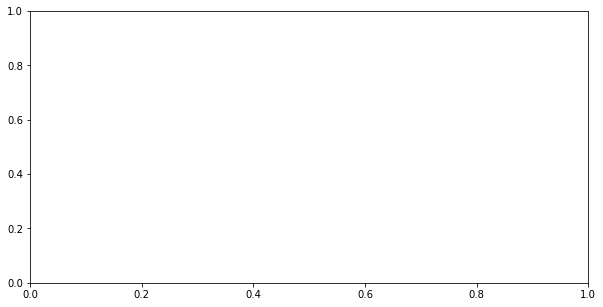

In [68]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(drop_precision_test.precision,color='green',label='drop_precision')
ax.set_ylabel('drop_precision',color='green',fontsize=20)
ax.tick_params(axis='y',labelcolor='skyblue')
plt.grid()
ax.legend(loc='upper left')

ax2=ax.twinx()
ax2.plot(precision_test.precision,color='red',label='rise_precision')
ax2.set_ylabel('rise_precision',color='red',fontsize=20)
ax2.tick_params(axis='y',labelcolor='red')
ax2.legend(loc='upper right')

plt.title('precision v.s. ', color='limegreen')


threshold = 0.3
i = 0
while i < 50 :
    threshold += (i/2000)
    predicted_proba = xgbc.predict_proba(X_test)
    predicted = (predicted_proba [:,1] >= threshold).astype('int')
    precision = precision_score(y_test, predicted)
    i+=1
    print (threshold ,' : ' ,precision)

AttributeError: 'DataFrame' object has no attribute 'precision'

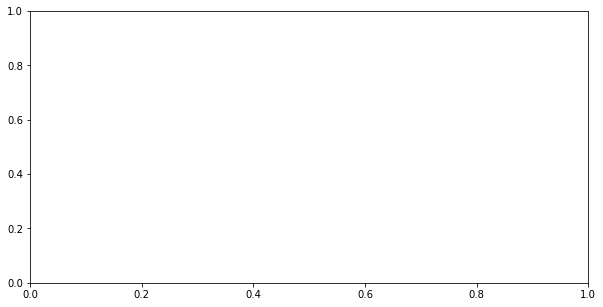

In [69]:

fig,ax=plt.subplots(figsize=(10,5))
ax.plot(drop_precision_test.precision,color='green',label='drop_precision')
ax.set_ylabel('drop_precision',color='green',fontsize=20)
ax.tick_params(axis='y',labelcolor='skyblue')
plt.grid()
ax.legend(loc='upper left')

ax2=ax.twinx()
ax2.plot(index.收盤,color='black',label='Market')
ax2.set_ylabel('Market',color='black',fontsize=20)
ax2.tick_params(axis='y',labelcolor='black')
ax2.legend(loc='upper right')

plt.title('precision v.s. Market ', color='limegreen')


Text(0.5, 1.0, 'precision v.s. Market ')

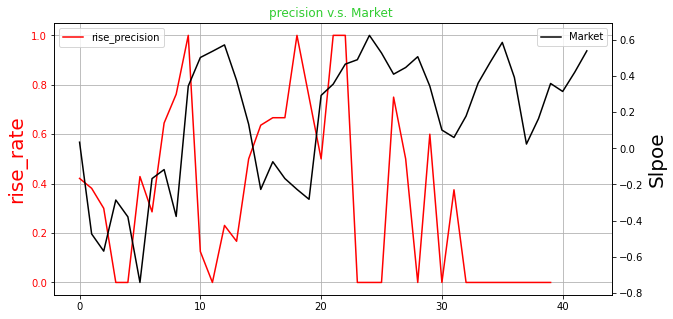

In [ ]:

fig,ax=plt.subplots(figsize=(10,5))
ax.plot((precision_test.precision + drop_precision_test.precision),color='red',label='rise_precision')
ax.set_ylabel('rise_precision',color='red',fontsize=20)
ax.tick_params(axis='y',labelcolor='red')
plt.grid()
ax.legend(loc='upper left')


plt.title('precision v.s. Market ', color='limegreen')

In [37]:
feature=pd.DataFrame()
feature['name'] = X_train.columns
feature['score'] = xgbc.feature_importances_

feature.sort_values(by=['score'] , ascending=False, axis =0 , inplace=True)

feature[0:50]

,name,score
203,概念股_能源–太陽能,0.066503
134,概念股_智慧家電–智慧音箱,0.041107
289,昨天預測結果,0.039367
100,概念股_半導體–矽智財,0.032410
72,概念股_ETF–台灣50,0.025104
195,概念股_網路–SDN,0.024802
45,UD前高壓力,0.023965
269,產業別_玻璃陶瓷,0.023273
282,產業別_電子零組件業,0.022269
288,前期比較增減(%),0.021451


In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch

In [ ]:
import torch.utils.data as data
import io
import imageio
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
from tqdm import tqdm_notebook as tqdm #pip install tqdm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
import pandas as pd
import numpy as np
import os

In [ ]:
import torchvision.datasets as dset
import torchvision.transforms as transforms

In [ ]:
class network(nn.Module):
    def __init__(self):
        super(network,self).__init__()
        self.L1 = nn.Linear(58,30)
        self.L2 = nn.Linear(30,18)
        self.L3 = nn.Linear(18,10)
        self.L4 = nn.Linear(10,7)
        self.L5 = nn.Linear(7,4)
        self.output = nn.Linear(4,2)
    def forward(self , x):
        x = F.relu(self.L1(x))
        x = F.relu(self.L2(x))
        x = F.relu(self.L3(x))
        x = F.relu(self.L4(x))
        x = F.relu(self.L5(x))
        x = self.output(x)
        return x

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

In [ ]:
X_train, y_train = ros.fit_resample(X_train, y_train)

In [ ]:
from collections import Counter
print(sorted(Counter(y_train).items()))

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_train = X_train_std 

sc.fit(X_test)
X_valid_std = sc.transform(X_test)
X_valid = X_valid_std

In [ ]:
X_train.shape,y_train.shape

In [ ]:
tensor_x = torch.from_numpy(X_train)
tensor_y = torch.from_numpy(y_train.to_numpy())
tensor_y = torch.squeeze(tensor_y)
tensor_x_test = torch.from_numpy(X_valid)
tensor_y_test = torch.from_numpy(y_test.to_numpy())
tensor_y_test = torch.squeeze(tensor_y_test)

In [ ]:
#trans = transforms.Compose([transforms.ToTensor()]) 
#train_set = dset.MNIST(root='.', train=True, download=True ,transform=trans)
#test_set = dset.MNIST(root='.', train=False,transform=trans)
train_set = data.TensorDataset(tensor_x,tensor_y)
test_set = data.TensorDataset(tensor_x_test,tensor_y_test)
train_dataset = data.DataLoader(dataset =  train_set,batch_size=100,shuffle=True)
test_dataset = data.DataLoader(dataset = test_set , batch_size=100)

In [ ]:
use_cuda = torch.cuda.is_available()
use_cuda

In [ ]:
use_cuda = torch.cuda.is_available()
net = network()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=net.parameters())
loss_history = []
if use_cuda:
    net = net.cuda()
for e in tqdm(range(30)):
    epoch_loss_sum = 0
    for x , y in tqdm(train_dataset):
        if use_cuda:
            x = x.cuda()
            y = y.cuda()
        batch_size = x.shape[0]
        x = x.view(batch_size,-1)
        net_out = net(x.float())
        loss = loss_fn(net_out , y)
        epoch_loss_sum += float(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    loss_history.append(epoch_loss_sum)

In [ ]:
correct_count = 0
total_testing = len(test_set)
for x,y in test_dataset:
    if use_cuda:
        x = x.cuda()
        y = y.cuda().detach()
    batch_size = x.shape[0]
    x = x.view(batch_size,-1)
    output = net(x.float()).max(1)[1] #output出來是一個向量
    correct_count += torch.sum(output==y).item()
    #print(torch.sum(output==y))
    #print("output = {}".format(output))
    #print("y = {}".format(y))
    #print("======")
#print(correct_count, total_testing)
#correct_count = correct_count
print('accuracy rate',correct_count/total_testing)

In [ ]:
y_pred = net(tensor_x_test.float()).max(1)[1]
y_prediction = y_pred.detach().cpu().numpy() 
y_prediction


In [ ]:
y_test2 = tensor_y_test.numpy()

In [ ]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix : ")
confusion_matrix(y_test,y_prediction)

In [ ]:
y_test.value_counts()